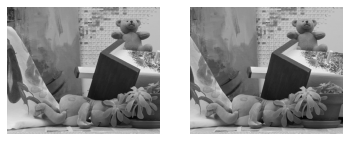

In [8]:
from PIL import Image
from pylab import *
from numpy import *
from numpy.ma import array
from scipy.ndimage import filters
import matplotlib.pyplot as plt
def plane_sweep_ncc(im_l,im_r,start,steps,wid):
    """ 使用归一化的互相关计算视差图像 """
    m,n = im_l.shape
    # 保存不同求和值的数组
    mean_l = zeros((m,n))
    mean_r = zeros((m,n))
    s = zeros((m,n))
    s_l = zeros((m,n))
    s_r = zeros((m,n))
    # 保存深度平面的数组
    dmaps = zeros((m,n,steps))
    # 计算图像块的平均值
    filters.uniform_filter(im_l,wid,mean_l)
    filters.uniform_filter(im_r,wid,mean_r)
    # 归一化图像
    norm_l = im_l - mean_l
    norm_r = im_r - mean_r
    # 尝试不同的视差
    for displ in range(steps):
        # 将左边图像移动到右边，计算加和
        filters.uniform_filter(np.roll(norm_l, -displ - start) * norm_r, wid, s) # 和归一化
        filters.uniform_filter(np.roll(norm_l, -displ - start) * np.roll(norm_l, -displ - start), wid, s_l)
        filters.uniform_filter(norm_r*norm_r,wid,s_r) # 和反归一化
        # 保存 ncc 的分数
        dmaps[:,:,displ] = s / sqrt(s_l * s_r)
        # 为每个像素选取最佳深度
    return np.argmax(dmaps, axis=2)
def plane_sweep_gauss(im_l,im_r,start,steps,wid):
 """ 使用带有高斯加权周边的归一化互相关计算视差图像 """
 m,n = im_l.shape
 # 保存不同加和的数组
 mean_l = zeros((m,n))
 mean_r = zeros((m,n))
 s = zeros((m,n))
 s_l = zeros((m,n))
 s_r = zeros((m,n))
 # 保存深度平面的数组
 dmaps = zeros((m,n,steps))
 # 计算平均值
 filters.gaussian_filter(im_l,wid,0,mean_l)
 filters.gaussian_filter(im_r,wid,0,mean_r)
 # 归一化图像
 norm_l = im_l - mean_l
 norm_r = im_r - mean_r
 # 尝试不同的视差
 for displ in range(steps):
     # 将左边图像移动到右边，计算加和
     filters.gaussian_filter(np.roll(norm_l, -displ - start) * norm_r, wid, 0, s) # 和归一化
     filters.gaussian_filter(np.roll(norm_l, -displ - start) * np.roll(norm_l, -displ - start), wid, 0, s_l)
     filters.gaussian_filter(norm_r*norm_r,wid,0,s_r) # 和反归一化
     # 保存 ncc 的分数
     dmaps[:,:,displ] = s / np.sqrt(s_l * s_r)
 # 为每个像素选取最佳深度
 return np.argmax(dmaps, axis=2)
im_l = array(Image.open('data/teddy/im2.png').convert('L'), 'f')
im_r = array(Image.open('data/teddy/im6.png').convert('L'), 'f')
plt.subplot(1, 2, 1)
plt.imshow(im_l, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(im_r, cmap='gray')
plt.axis('off')
plt.show()

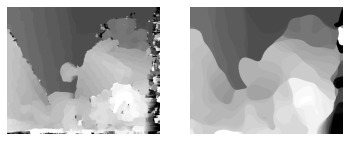

In [9]:
# 开始偏移，并设置步长
steps = 40
start = 4
# ncc 的宽度
wid = 15
res1 = plane_sweep_ncc(im_l,im_r,start,steps,wid)
res2 = plane_sweep_gauss(im_l,im_r,start,steps,wid)
# import scipy.misc
# scipy.misc.imsave('depth_ccg_width15.png',res)

plt.subplot(1, 2, 1)
plt.imshow(res1, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(res2, cmap='gray')
plt.axis('off')
plt.show()